# La méthadologie : CRISP-DM

CRISP-DM, qui signifie Cross-Industry Standard Process for Data Mining, est une méthode mise à l'épreuve sur le terrain permettant d'orienter vos travaux d'exploration de données.


-En tant que méthodologie, CRISP-DM comprend des descriptions des phases typiques d'un projet et des tâches comprises dans    chaque phase, et une explication des relations entre ces tâches.


-En tant que modèle de processus, CRISP-DM offre un aperçu du cycle de vie de l'exploration de données.


## Compréhension des affaires : (Business Understanding)

Cet ensemble de données provient à l'origine de l'Institut national du diabète et des maladies digestives et rénales.
L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est atteint de diabète sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. 



Plusieurs contraintes ont été placées sur la sélection de ces instances à partir d'une plus grande base de données.
En particulier, tous les patients ici sont des femmes d' au moins 21 ans d'origine indienne Pima. variable dépendante cible (Résultat).

## Compréhension des données : (Data Understanding)

on traite et analyse une base de donnée de  des femmes qui atteint de diabete 


cette base de donnée contient:


les nombres de grossesses : int16   


le taux de glucose   : int64


la mesure de tension artérielle : int64


le taux de l'insuline  : int64


l'indice de masse corporelle IMC : float64


pourcentage de diabète : float64


l'age : int64


l'epaisseur de la peau : int64


résultat: boolean

## Préparation des données : (Data Preparation)

La préparation des données est le processus de nettoyage et de transformation des données brutes avant le traitement et l'analyse. 


Il s'agit d'une étape importante avant le traitement et implique souvent la reformatation des données, la correction des données et la combinaison d'ensembles de données pour enrichir les données.

Le processus de préparation des données comprend généralement la normalisation des formats de données, l'enrichissement des données source et / ou la suppression des valeurs aberrantes.

La préparation des données est le processus de collecte, de nettoyage et de consolidation des données dans un fichier ou une table de données, principalement pour une utilisation en analyse.

Dans cette partie on fait analyse des données de l'explorateur (EDA)

l'importation des bibliothèques nécessaires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('diabetes.csv')


In [7]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

Afficher les nombres de lignes de la base de donnée

In [7]:
print(len(df))

768


Afficher les titres de chaques lignes de base de données et leurs nombres

In [9]:
print(df.columns)
print(len(df.columns))

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
9


Afficher les types de chaque titre de colonnes de base de donnée

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Afficher une déscription statistique  de la base de donnée 


In [13]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Afficher la matrice de  correlation 

In [3]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Cette étape permet de nettoyage les données pour analyser et traiter de facon parfait

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Il n'existe pas aucun valeurs manquées ou NaN 

In [10]:
len(df.loc[(df['Glucose']==0)])

5

Il ya 5 valeurs null qui est inpossible donc il semble d'etre des valeurs manquées NaN et remplacer par zéro

In [12]:
len(df.loc[(df['BMI']==0)])

11

Il ya 11 valeurs null qui est inpossible donc il semble d'etre des valeurs manquées NaN et remplacer par zéro

Verifier s'il existe des valeurs dupliquer ou nn

In [17]:
df.duplicated().sum()

0

Verifier s'il existe de symbols comme *,+,?,-,...

In [18]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


D'apres la resultat précedente il n'y a pas aucune valeurs manquées de data 

Dans cette étape on commence de visualizer les données

In [ ]:
print(df['Pregnancies'].max())
print(df['Pregnancies'].min())

17
0


<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

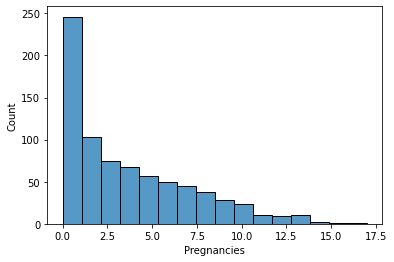

In [ ]:
import seaborn as sns
sns.histplot(df['Pregnancies'])

L'evolution de nbrs de grossesses par rapport à l'age

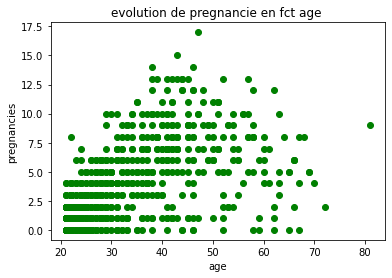

In [20]:
plt.scatter(df['Age'],df['Pregnancies'],color='green')
plt.ylabel('pregnancies')
plt.xlabel('age')
plt.title('evolution de pregnancie en fct age ')
plt.show()

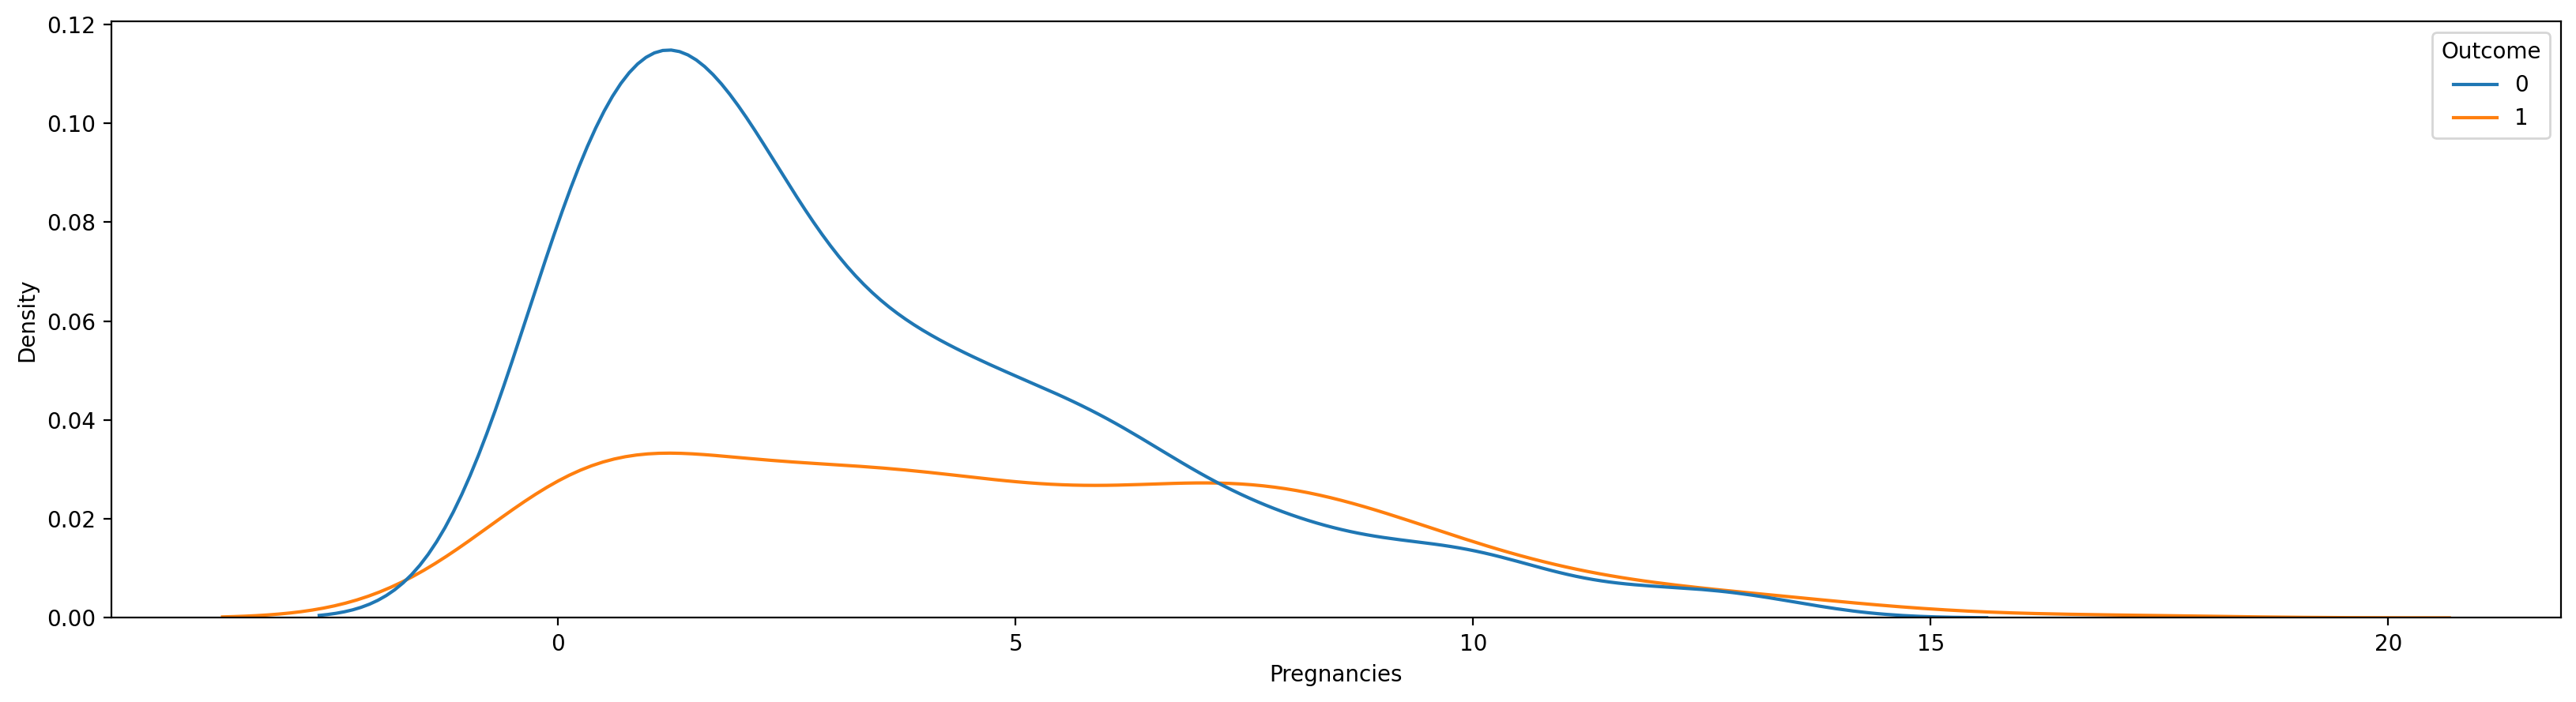

In [10]:
plt.figure(figsize=(20,5),dpi=200)
sns.kdeplot(x="Pregnancies",hue="Outcome",data=df)

In [11]:
df["more_than_1child"]=[1 if i>0 else 0 for i in df["Pregnancies"]]

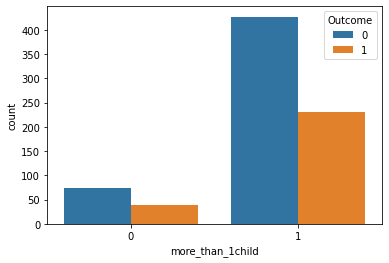

In [12]:
sns.countplot(x="more_than_1child",hue="Outcome",data=df)

In [5]:
#nombre de femme qui atteint la diabéte
cas_att=df[df['Outcome']==1]
cas_att.shape[0]

268

In [ ]:
#d'apres la resultat il y'a 268 cas qui atteint par le diabète parmis 768

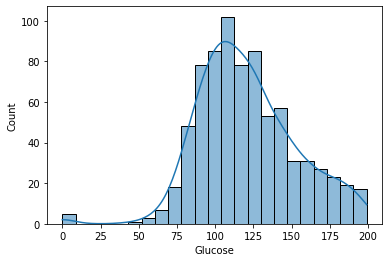

In [14]:
#glucose distribution
import seaborn as sns
sns.histplot(df['Glucose'],kde=True)

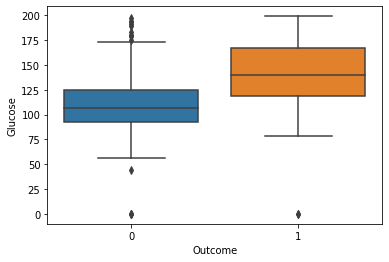

In [16]:
sns.boxplot(x="Outcome",y="Glucose",data=df)

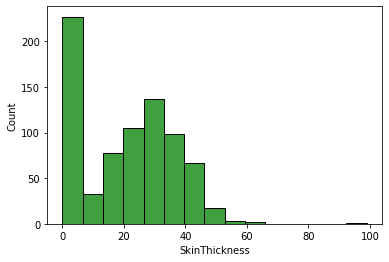

In [20]:
#SkinThickness distribution
import seaborn as sns
sns.histplot(df['SkinThickness'],color='green')

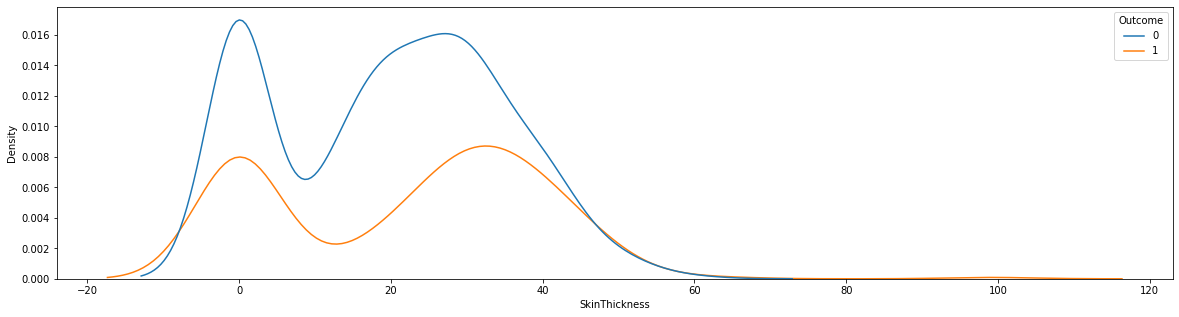

In [22]:
plt.figure(figsize=(20,5))
sns.kdeplot(x="SkinThickness",hue="Outcome",data=df)

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

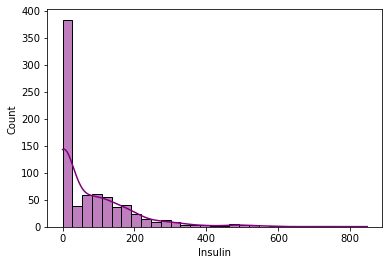

In [ ]:
#Insuline distribution
import seaborn as sns
sns.histplot(df['Insulin'],kde=True,color='purple')

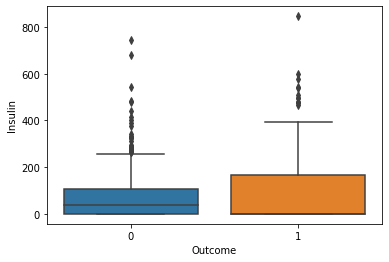

In [30]:

sns.boxplot(x="Outcome",y="Insulin",data=df)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

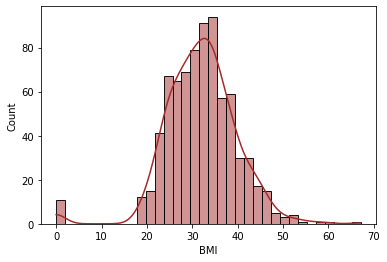

In [ ]:
#BMI distribution

sns.histplot(df['BMI'],kde=True,color='brown')

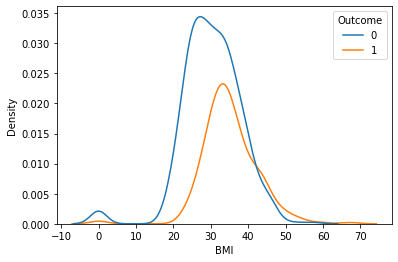

In [32]:
sns.kdeplot(x="BMI",hue="Outcome",data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

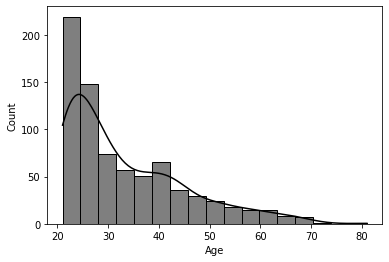

In [ ]:
#age distribution

sns.histplot(df['Age'],kde=True,color='black')

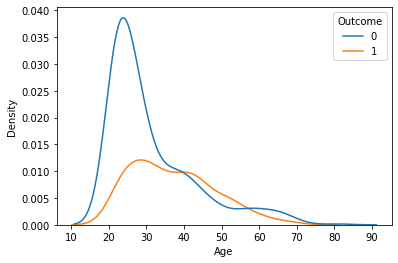

In [33]:
sns.kdeplot(x="Age",hue="Outcome",data=df)

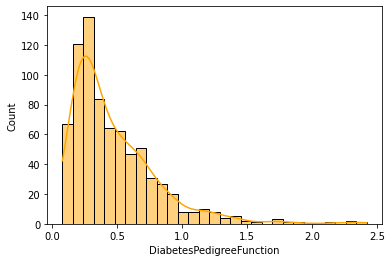

In [36]:


sns.histplot(df['DiabetesPedigreeFunction'],kde=True,color='orange')

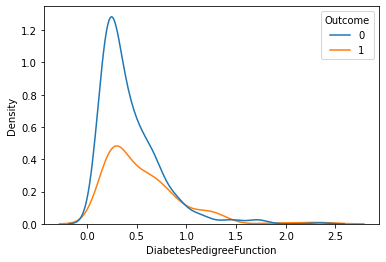

In [37]:
sns.kdeplot(x="DiabetesPedigreeFunction",hue="Outcome",data=df)

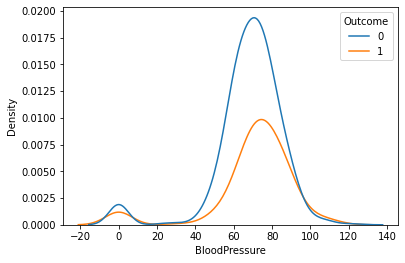

In [49]:
sns.kdeplot(x="BloodPressure",hue="Outcome",data=df)

In [57]:
df[df['BloodPressure']<=0].sort_values('Outcome', ascending=False)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
706           10      115              0              0        0   0.0   
266            0      138              0              0        0  36.3   
468            8      120              0              0        0  30.0   
435            0      141              0              0        0  42.4   
535            4      132              0              0        0  32.9   
15             7      100              0              0        0  30.0   
357           13      129              0             30        0  39.9   
332            1      180              0              0        0  43.3   
300            0      167              0              0        0  32.3   
269            2      146              0              0        0  27.5   
261            3      141              0              0        0  30.0   
604            4      183              0              0        0  28.4   
193           11      135              0              0        0  52.3   
619            0      119              0              0        0  32.4   
78             0      131              0              0        0  43.2   
484            0      145              0              0        0  44.2   
522            6      114              0              0        0   0.0   
601            6       96              0              0        0  23.7   
589            0       73              0              0        0  21.1   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
533            6       91              0              0        0  29.8   
703            2      129              0              0        0  38.5   
7             10      115              0              0        0  35.3   
494            3       80              0              0        0   0.0   
453            2      119              0              0        0  19.6   
430            2       99              0              0        0  22.2   
347            3      116              0              0        0  23.5   
336            0      117              0              0        0  33.8   
222            7      119              0              0        0  25.2   
172            2       87              0             23        0  28.9   
81             2       74              0              0        0   0.0   
60             2       84              0              0        0   0.0   
49             7      105              0              0        0   0.0   
426            0       94              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  more_than_1child  
706                     0.261   30        1                 1  
266                     0.933   25        1                 0  
468                     0.183   38        1                 1  
435                     0.205   29        1                 0  
535                     0.302   23        1                 1  
15                      0.484   32        1                 1  
357                     0.569   44        1                 1  
332                     0.282   41        1                 1  
300                     0.839   30        1                 0  
269                     0.240   28        1                 1  
261                     0.761   27        1                 1  
604                     0.212   36        1                 1  
193                     0.578   40        1                 1  
619                     0.141   24        1                 0  
78                      0.270   26        1                 0  
484                     0.630   31        1                 0  
522                     0.189   26        0                 1  
601                     0.190   28        0                 1  
589                     0.342   25        0                 0  
643                     0.610   31        0                 

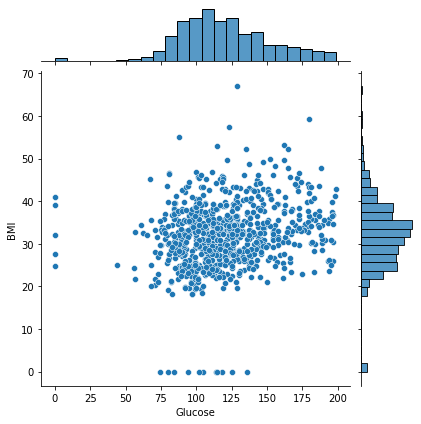

In [48]:

sns.jointplot(x="Glucose",y="BMI",data=df)



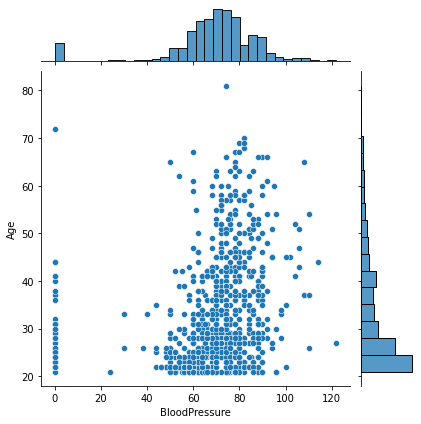

In [52]:
sns.jointplot(x="BloodPressure",y="Age",data=df)

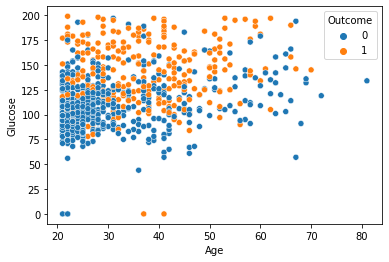

In [54]:
sns.scatterplot(x="Age",y="Glucose",hue="Outcome",data=df)

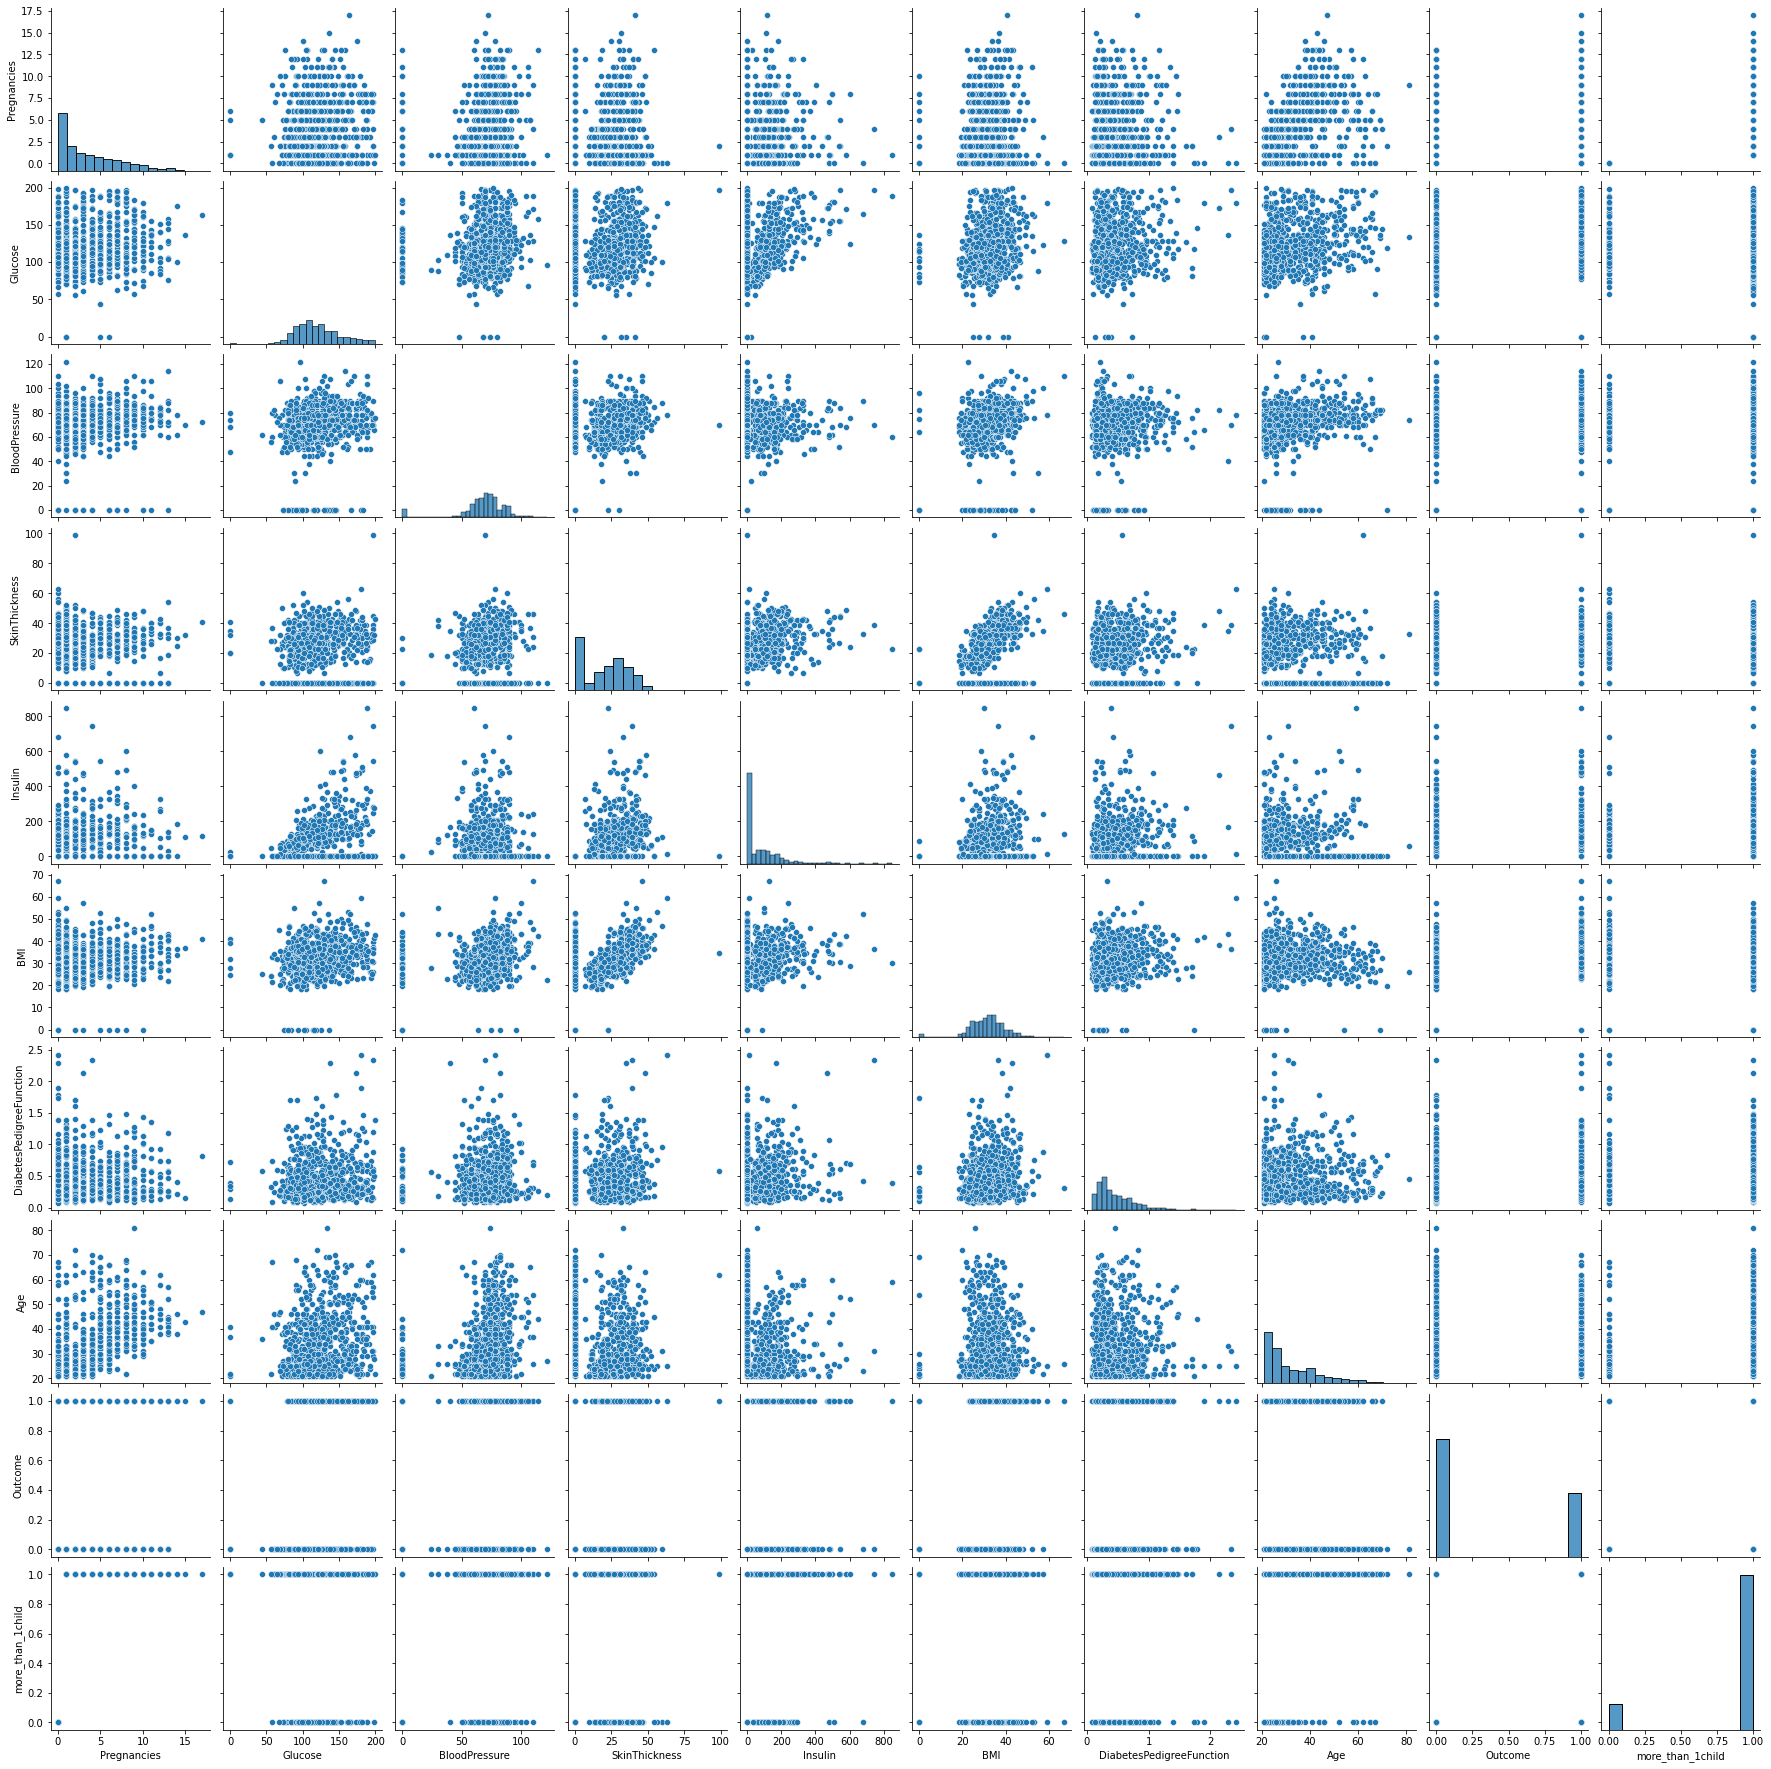

In [55]:
sns.pairplot(df)

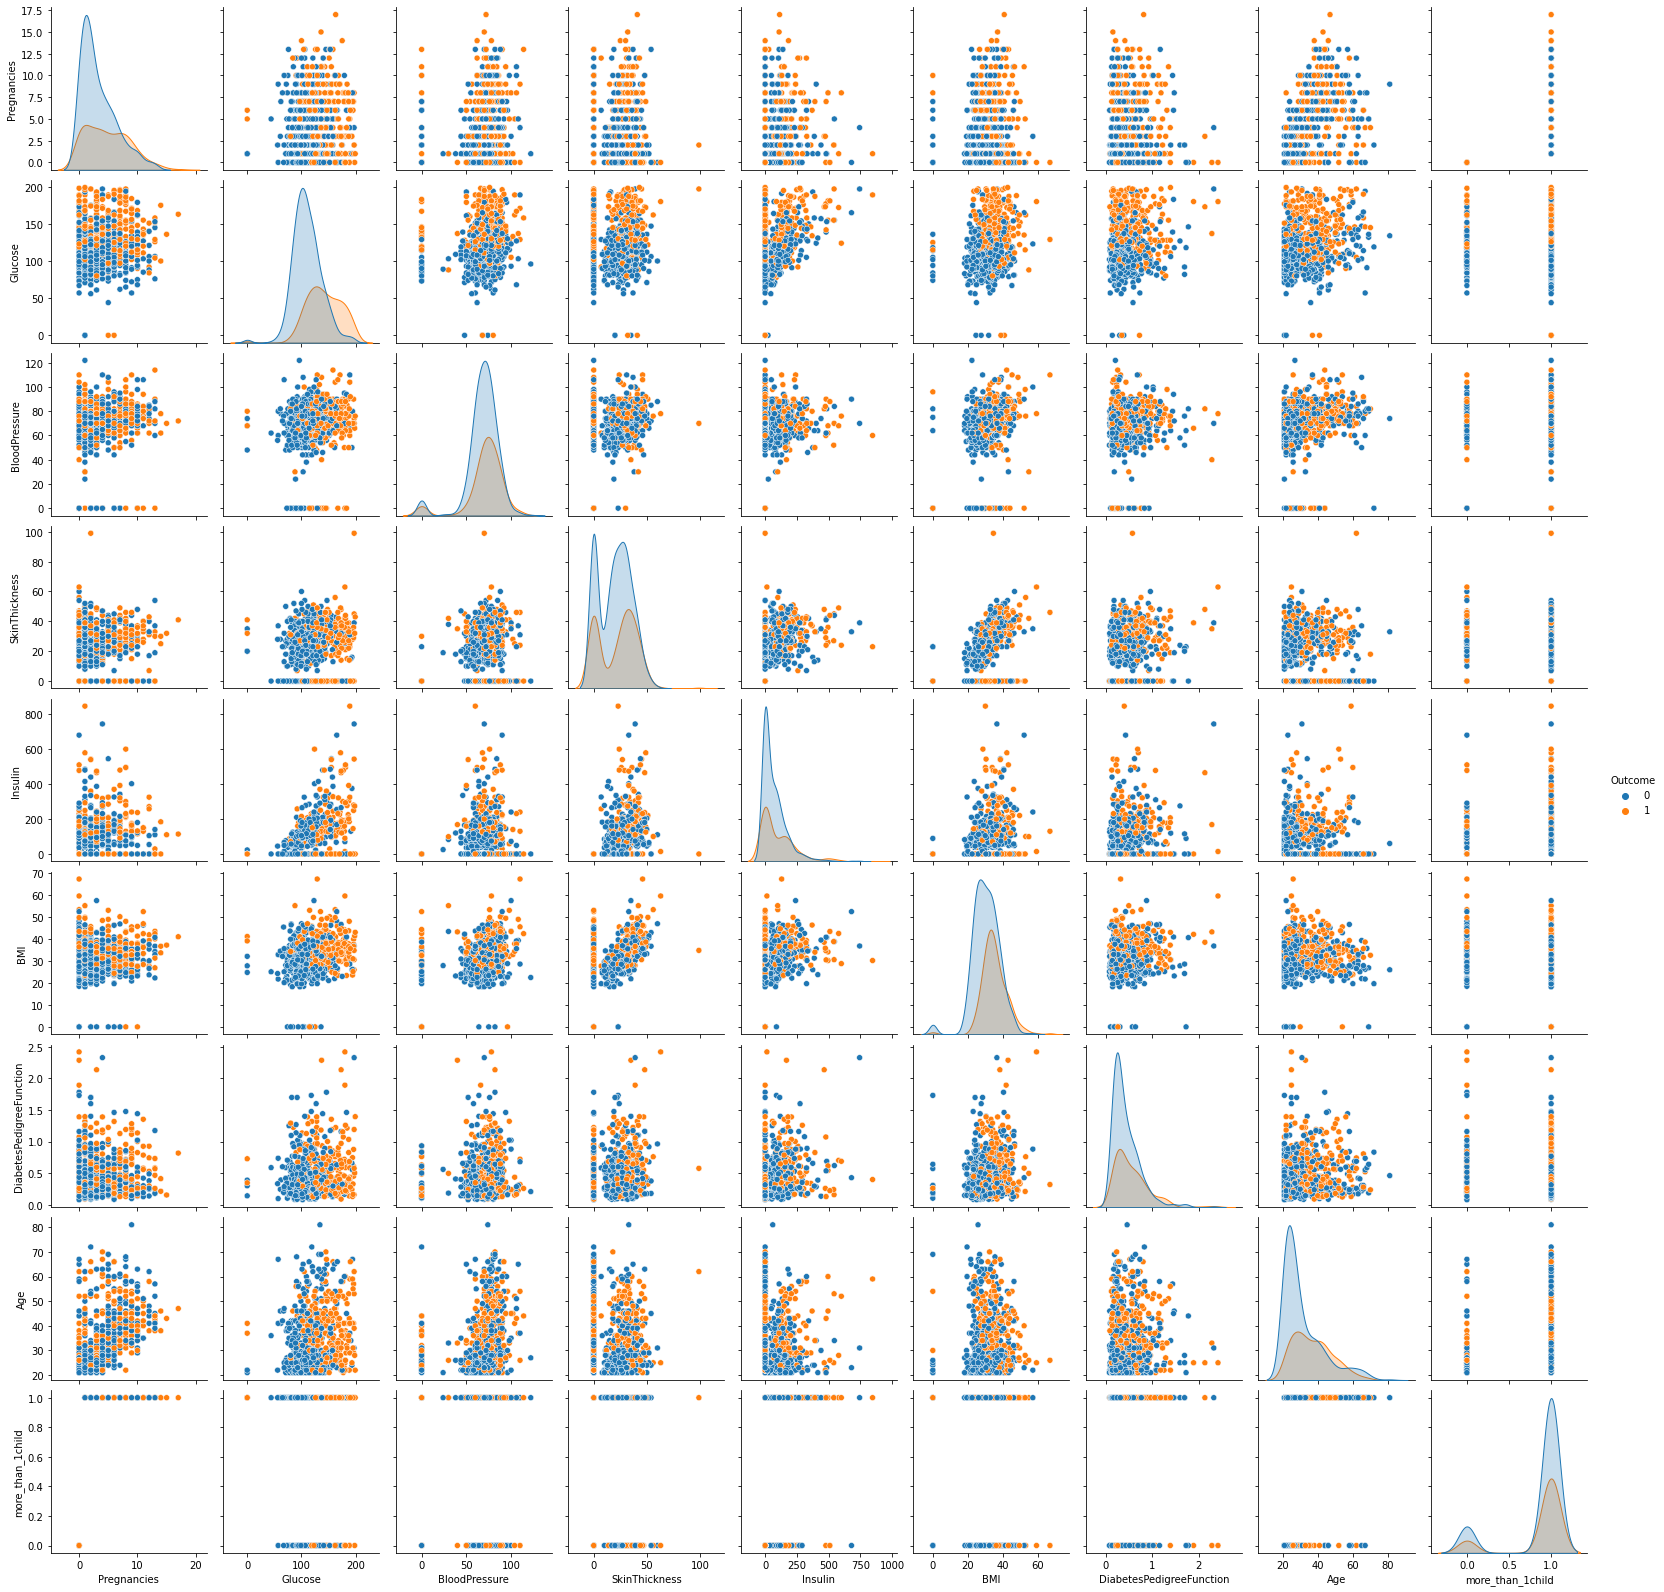

In [56]:
sns.pairplot(df,hue="Outcome")

In [21]:
import plotly.express as px
px.pie(df, names = 'Outcome' , title = "Outcome Frequency")

Correlation

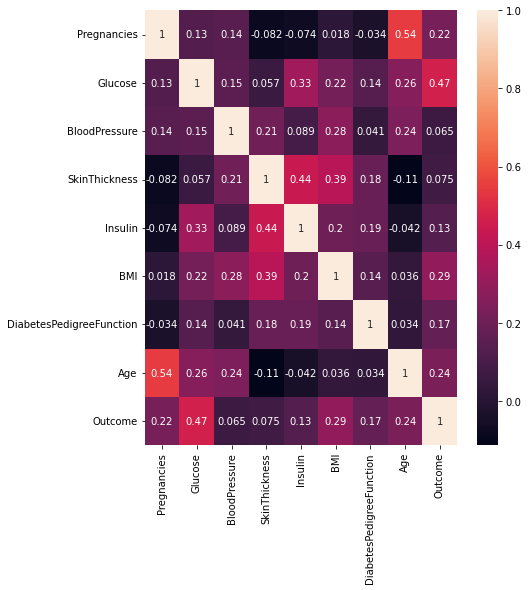

In [24]:
plt.figure(figsize=[7,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

## Machine Learning : Classification

Determiner les nombres de entrés differents 0 pour une personne diabétique et 0 pour une personne normale 

In [44]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [30]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

Séparation de données et étiquette Outcome

In [31]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

Importation de biblotheques et modules necessaires

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [51]:
scaler=StandardScaler()
scaler.fit(x)
standard_data=scaler.transform(x)
print(standard_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [53]:
x=standard_data
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [55]:
y=df['Outcome']
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


deviser les données x et y en sous ensemble de test et formé aleatoirement

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [62]:
print(x.shape,x_test.shape,x_train.shape)
print(y.shape,y_test.shape,y_train.shape)

(768, 8) (154, 8) (614, 8)
(768,) (154,) (614,)


La méthode utlilisé pour la classification est SVM : Support Vector Machine

Les avantages des machines à vecteurs de support sont:

Efficace dans les espaces de haute dimension.

Toujours efficace dans les cas où le nombre de dimensions est plus élevé que le nombre d'échantillons.

Utilise un sous-ensemble de points de formation dans la fonction de décision ( appelé prend en charge les vecteurs ), il est donc également économe en mémoire.

In [72]:
classifier=svm.SVC(kernel='linear')


In [73]:
classifier.fit(x_train,y_train)

SVC()

Evaluation le modéle et calculer la précision de train et test ensemble 

In [80]:
x_test_pred=classifier.predict(x_test)
test_data_accu=accuracy_score(x_test_pred,y_test)
print(test_data_accu)

0.7272727272727273


In [82]:
x_train_pred=classifier.predict(x_train)
train_data_accu=accuracy_score(x_train_pred,y_train)
print(train_data_accu)

0.8289902280130294


In [89]:
data=(2,95,40,20,30,20,0.315,22)
x=np.asarray(data)
xr=x.reshape(1,-1)
pred_stand=scaler.transform(xr)
print(pred_stand)
pred=classifier.predict(pred_stand)
print(pred)

[[-0.54791859 -0.81042491 -1.50468724 -0.03365099 -0.43240369 -1.52208897
  -0.47378505 -0.95646168]]
[0]


C:\Users\gamer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [87]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')